In [24]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


In [25]:
letter = pd.read_csv("letter_recognition.csv")
letter.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [26]:
order = list(np.sort(letter['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [27]:
print("Dimensions:",letter.shape, "\n")
print(letter.info())



Dimensions: (20000, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


<AxesSubplot:xlabel='letter', ylabel='ybox'>

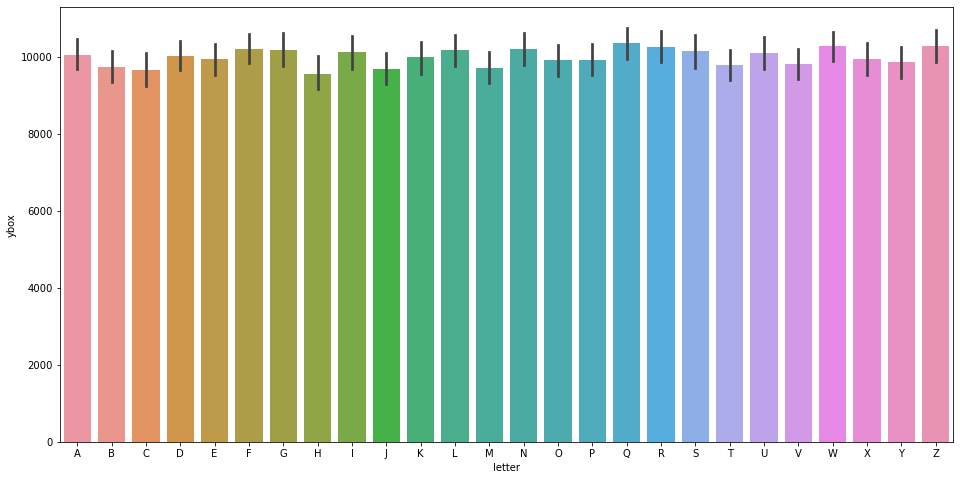

In [28]:
plt.figure(figsize=(16,8))
letter['ybox']=letter.index
sns.barplot(x='letter', y='ybox', data=letter, order=order)

In [29]:
letter_means = letter.groupby('letter').mean()
letter_means.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,ybox
letter,,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948,10053.551331
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522,9746.546997
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707,9667.134511
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571,10031.013665
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510,9941.994792


In [48]:
X = letter.drop(['letter'],axis=1)
X


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,ybox
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,0
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,19995
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,19996
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,19997
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,19998


In [49]:
letter['letter'] = letter['letter']
y = np.asarray(letter['letter'])
y[0:5]

array(['T', 'I', 'D', 'N', 'G'], dtype=object)

In [50]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.0576983 ,  0.29187713, -1.05327668, -0.16470367, -1.14401317,
         0.54413045,  2.36509711, -1.71435955,  0.34499439, -0.91707055,
         1.34777427,  0.03412531, -1.30594761, -0.21908163, -1.4381527 ,
         0.12291107, -1.73196421],
       [ 0.51038497,  1.5023577 , -1.05327668,  0.71973007, -0.6874762 ,
         1.53130471, -1.07532563,  0.13756063, -0.4950723 ,  1.89596765,
        -1.31280664,  0.51476353, -0.4484921 , -0.21908163,  0.12008142,
         1.35944092, -1.731791  ],
       [-0.01230945,  1.19973756,  0.43590966,  1.16194694,  1.13867169,
         1.53130471, -0.64527279, -0.97359148,  0.34499439,  0.69037985,
        -1.31280664, -0.4465129 , -0.01976435, -0.8656262 , -0.26947711,
         0.74117599, -1.7316178 ],
       [ 1.55577381,  1.19973756,  0.43590966,  0.2775132 , -0.23093923,
        -0.93663094,  0.64488574, -0.23282341,  0.34499439, -1.72079575,
        -0.93272365,  0.99540174,  1.26641891,  1.07400752, -0.65903564,
         0.12291107

In [51]:
letter = letter[pd.to_numeric(letter['letter'], errors='coerce').notnull()]
letter['letter'] = letter['letter'].astype('int')
letter.dtypes

letter    int32
xbox      int64
ybox      int64
width     int64
height    int64
onpix     int64
xbar      int64
ybar      int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybar    int64
xy2bar    int64
xedge     int64
xedgey    int64
yedge     int64
yedgex    int64
ybox      int64
dtype: object

In [52]:
print(letter.columns)

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex', 'ybox'],
      dtype='object')


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (14000, 17) (14000,)
Test set: (6000, 17) (6000,)


In [57]:
from sklearn import svm 
letter = svm.SVC(kernel='rbf')
letter.fit(X_train, y_train)

SVC()

In [60]:
yhat=letter.predict(X_test)
yhat[0:5]

array(['D', 'K', 'H', 'E', 'V'], dtype=object)

In [63]:
from sklearn.metrics import f1_score
f1_score(yhat,y_test,average='weighted')

0.937062834448197

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           A       0.98      0.98      0.98       243
           B       0.82      0.95      0.88       203
           C       0.97      0.93      0.95       215
           D       0.88      0.95      0.91       228
           E       0.91      0.91      0.91       228
           F       0.89      0.96      0.92       204
           G       0.88      0.93      0.90       234
           H       0.87      0.81      0.84       202
           I       0.97      0.92      0.94       234
           J       0.95      0.93      0.94       225
           K       0.94      0.92      0.93       225
           L       0.99      0.90      0.94       228
           M       0.96      0.95      0.95       251
           N       0.96      0.95      0.95       234
           O       0.94      0.93      0.93       255
           P       0.99      0.90      0.94       237
           Q       0.92      0.97      0.95       241
           R       0.86    